In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

<h1>Dataset Preprocessing</h1>
<hr>
<h2> - 유사 One-Hot-Encoding 준비

<h2> - 장르별 유사 One-Hot-Encoding</h2>
<hr>발라드, 인디음악 -> 과 같이 여러개일 경우 해당하는 값에 모두 1처리하고 나중에 가중치를 다르게 매길 것이기 때문에 유사 One-Hot-
Encoding

In [2]:
flag = 1 #0:진행 / 1:파일 읽기 / 2:최종 탈출

while flag != 2:
    if flag == 1:
        print('read csv')
        global myMusic,allGenre,my_genre,all_genre,genre_ohe
        myMusic = pd.read_csv('./myMusic.csv')
        allGenre = pd.read_csv('./allGenre.csv')

        my_genre = myMusic['genre']
        all_genre = allGenre['장르']
        
        genre_ohe = [[0 for _ in range(len(all_genre))] for _ in range(len(my_genre))]
        flag = 0
    else:
        for idx,gen in enumerate(my_genre):
            l_gen = gen.split(', ')
            if len(l_gen) > 1:
                for t_gen in l_gen:
                    try : genre_ohe[idx][all_genre[all_genre == t_gen].index[0]] = 1
                    except :
                        with open('./allGenre.csv','a',encoding='utf-8') as file:
                            wText = pd.DataFrame(t_gen,columns=['장르'],index = [len(all_genre)])
                            wText.to_csv(file,header = False,encoding='utf-8')
                            print("Append New Genre : ",t_gen)
                            flag = 1
                            break
            else:
                try : genre_ohe[idx][all_genre[all_genre == gen].index[0]] = 1
                except :
                    with open('./allGenre.csv','a',encoding='utf-8') as file:
                        wText = pd.DataFrame(gen,columns=['장르'],index = [len(all_genre)])
                        wText.to_csv(file,header = False,encoding='utf-8')
                        print("Append New Genre : ",gen)
                        flag = 1
            if flag == 1 :
                break
        if flag == 0:
            flag = 2
        #     print(genre_ohe[idx],end='\t')
        print(idx,gen)
    
print(all_genre)

read csv
49 발라드
0          영어동화
1         Urban
2           트로트
3        포크/블루스
4      뉴메탈/하드코어
         ...   
115         컨트리
116          게임
117    애니메이션/웹툰
118          키즈
119        성인가요
Name: 장르, Length: 120, dtype: object


In [3]:
sumArray = np.zeros(len(genre_ohe[0]))
for i in genre_ohe:
    sumArray += np.array(i)
sumArray_myGenre = sumArray

In [4]:
my_preference = (sumArray - np.mean(sumArray,axis = 0))/ np.std(sumArray,axis = 0)
print(my_preference)

[-0.22216516 -0.22216516 -0.22216516  0.23748689 -0.22216516 -0.22216516
  1.15679099 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
 -0.22216516  0.69713894 -0.22216516 -0.22216516 -0.22216516 -0.22216516
  3.45505122 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
 -0.22216516 -0.22216516 -0.22216516  1.61644303 -0.22216516 -0.22216516
 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516  0.69713894
 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516 -0.22216516
  4.83400737 -0.22216516 -0.22216516 -0.22216516 -0

In [5]:
my_preference = (sumArray - np.min(sumArray,axis = 0)) / (np.max(sumArray,axis = 0) - np.min(sumArray,axis = 0))
print(my_preference)

[0.         0.         0.         0.05555556 0.         0.
 0.16666667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.11111111 0.         0.         0.         0.
 0.44444444 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.22222222 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.11111111
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.61111111 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         0.         0.
 0.38888889 0.         0.         0.         0. 

In [6]:
def genre_cnt(genre):
    genre = genre.to_dict()
    new_dict = {}
    for gen in genre.values():
        try : new_dict[gen] += 1
        except : new_dict[gen] = 1
    return new_dict
    
def art_cnt(artist):
    artist = artist.to_dict()
    new_dict = {}
    for art in artist.values():
        try : new_dict[art] += 1
        except : new_dict[art] = 1
    return new_dict

my_artist = myMusic['artist']
my_artist = art_cnt(my_artist)
print(my_artist)

# artist_ohe = [[0 for _ in range(len(my_artist))]for _ in range(len(my_artist))]

# for idx,art in enumerate(my_artist):
#     artist_ohe[idx][idx] = my_artist[art]

# artist_ohe

{'제이워크': 5, 'Official Hige Dandism': 1, 'MC몽': 8, 'Aimyon': 3, '성시경': 2, '이무진': 1, '안예은': 1, '디핵 (D-Hack)': 1, '버스커 버스커': 1, 'BIGBANG': 1, 'San E': 1, '장범준': 2, '윤하 (YOUNHA)': 2, 'G-DRAGON': 1, '아이유': 1, '우주소녀': 1, '유승우': 1, 'FTISLAND (FT아일랜드)': 1, '정동하': 1, '장덕철': 3, '태연 (TAEYEON)': 1, '제이레빗(J Rabbit)': 1, '버즈': 1, '박세아': 1, '이은미': 1, '허각': 1, '코요태': 1, '러브홀릭스': 1, '신지': 1, '김종서': 1, 'Zion.T': 1, '거미': 1}


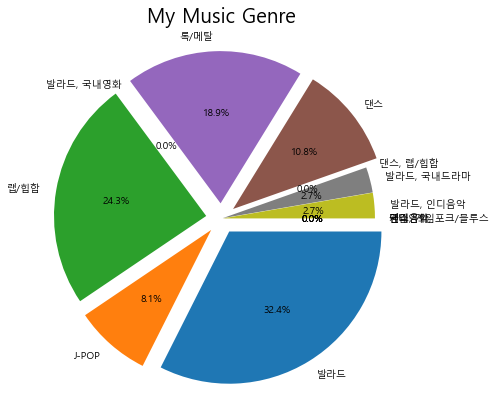

In [7]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.figure(figsize = (7,7))
genreCnt = {}

for g in myMusic['genre']:
    try : genreCnt[g] += 1
    except : genreCnt[g] = 0
      
    
labels = list(genreCnt.keys())
ratio = list(genreCnt.values())
explode = [ratio[i] * 0.01 for i in range(len(labels))]
for i,v in enumerate(explode):
    if v >= np.mean(ratio)*0.01:
        explode[i] = 0.1

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode = explode)
plt.title('My Music Genre',fontsize = 20)
plt.show()

<h1>cor DayChart</h1>

In [8]:
if 'DayChart' in os.listdir():
    try:
        global dayList
        dayChart = os.listdir('DayChart')
        print(dayChart[1:])
        
        #사용자로부터 파일 날짜 입력 받기
        input_dayChart = input("원하는 날짜 입력 (ex:20210720): ")
        match = re.search(r'\d{4}\d{2}\d{2}', input_dayChart)
        date = datetime.strptime(match.group(), '%Y%m%d').date()
        year = '{:=04}'.format(date.year)
        month = '{:=02}'.format(date.month)
        day = '{:=02}'.format(date.day)
        
        dayListF = year+month+day+'.csv'
        dayList = pd.read_csv('./DayChart/'+dayListF)
        
        print(dayList)

    except Exception as e:
        print(e)
else:
    pass

['20210720.csv', '20210722.csv', '20210723.csv', '20210724.csv', '20210728.csv', '20210801.csv', '20210804.csv', '20210805.csv', '20210807.csv']
원하는 날짜 입력 (ex:20210720): 20210807
     no                        title         artist               genre  \
0     1                       바라만 본다  MSG워너비(M.O.M)                 발라드   
1     2                          신호등            이무진                록/메탈   
2     3                   Next Level          aespa                  댄스   
3     4                낙하 (with 아이유)      AKMU (악뮤)  록/메탈, 댄스, R&B/Soul   
4     5          Permission to Dance          방탄소년단                  댄스   
..  ...                          ...            ...                 ...   
95   96                 다시 사랑할 수 있을까            백지영                 발라드   
96   97                      마음을 드려요            아이유          국내드라마, 발라드   
97   98                추적이는 여름 비가 되어            장범준           발라드, 록/메탈   
98   99  너의 발걸음에 빛을 비춰줄게 (Prod. 조영수)    케이시 (Kassy)                 발라드

In [9]:
flag = 1 #0:진행 / 1:파일 읽기 / 2:최종 탈출
dayListGenre = dayList['genre']
while flag != 2:
    if flag == 1:
        print('read csv')
        global myMusic,allGenre,my_genre,all_genre,genre_ohe
        myMusic = pd.read_csv('./myMusic.csv')
        allGenre = pd.read_csv('./allGenre.csv')

        my_genre = myMusic['genre']
        all_genre = allGenre['장르']
        
        genre_ohe = [[0 for _ in range(len(all_genre))] for _ in range(len(dayListGenre))]
        flag = 0
    else:
        for idx,gen in enumerate(dayListGenre):
            l_gen = gen.split(', ')
            if len(l_gen) > 1:
                for t_gen in l_gen:
                    try : genre_ohe[idx][all_genre[all_genre == t_gen].index[0]] = 1
                    except :
                        with open('./allGenre.csv','a',encoding='utf-8') as file:
                            wText = pd.DataFrame(t_gen,columns=['장르'],index = [len(all_genre)])
                            wText.to_csv(file,header = False,encoding='utf-8')
                            print("Append New Genre : ",t_gen)
                            flag = 1
                            break
            else:
                try : genre_ohe[idx][all_genre[all_genre == gen].index[0]] = 1
                except :
                    with open('./allGenre.csv','a',encoding='utf-8') as file:
                        wText = pd.DataFrame(gen,columns=['장르'],index = [len(all_genre)])
                        wText.to_csv(file,header = False,encoding='utf-8')
                        print("Append New Genre : ",gen)
                        flag = 1
            if flag == 1 :
                break
        if flag == 0:
            flag = 2
        #     print(genre_ohe[idx],end='\t')
#         print(idx,gen)
    
# print(all_genre)

sumArray = np.zeros(len(genre_ohe[0]))
for i in genre_ohe:
    sumArray += np.array(i)
sumArray_dayListGenre = sumArray
sumArray_dayListGenre

read csv


array([ 0.,  0.,  0.,  3.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0., 19.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
       13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,  0.,
       14.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., 45.,  0.,  0., 33.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.])

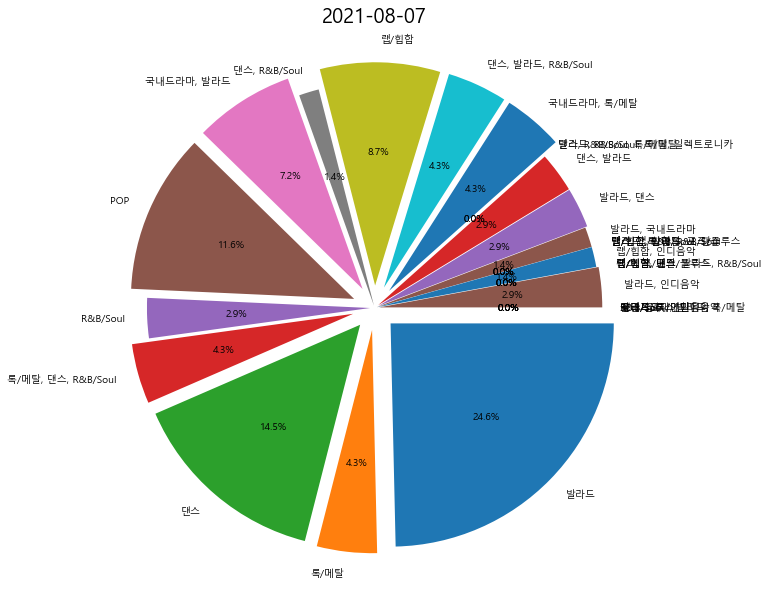

In [10]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.figure(figsize = (10,15))
genreCnt = {}

for g in dayListGenre:
    try : genreCnt[g] += 1
    except : genreCnt[g] = 0
      
labels = list(genreCnt.keys())
ratio = list(genreCnt.values())
explode = [ratio[i] * 0.01 for i in range(len(labels))]
for i,v in enumerate(explode):
    if v >= np.mean(ratio)*0.01:
        explode[i] = 0.1

#제목        
day_title = []
for i,t in enumerate(input_dayChart):
    if i == 4 or i == 6:
        day_title.append('-')
    day_title.append(t)
day_title = "".join(day_title)        
        
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode = explode)
plt.title(day_title,fontsize=20)
plt.show()

<h1>DayList 장르 개수</h1>

In [11]:
dayListGenreCnt = genre_cnt(dayListGenre)
dayListGenreCnt
columns = list(all_genre.values)
dayListGenreCnt = pd.DataFrame(dayListGenreCnt,columns=columns,index=['장르']).dropna(axis=1)
dayListGenreCnt = dayListGenreCnt.T
dayListGenreCnt

,장르
R&B/Soul,3
록/메탈,4
POP,9
랩/힙합,7
발라드,18
댄스,11
성인가요,1


In [12]:
myGenreCnt = genre_cnt(my_genre)
print(myGenreCnt)
columns = list(all_genre.values)
myGenreCnt = pd.DataFrame(myGenreCnt,columns=columns,index=['장르']).dropna(axis = 1)
myGenreCnt = myGenreCnt.T
myGenreCnt

{'발라드': 13, 'J-POP': 4, '랩/힙합': 10, '발라드, 국내영화': 1, '록/메탈': 8, '댄스': 5, '댄스, 랩/힙합': 1, '발라드, 국내드라마': 2, '발라드, 인디음악': 2, '인디음악, 포크/블루스': 1, '게임': 1, '국내영화': 1, '댄스, 게임': 1}


,장르
국내영화,1
록/메탈,8
J-POP,4
랩/힙합,10
발라드,13
댄스,5
게임,1


<h1>DayChart 100위 권 중 내가 들은 장르와의 겹치는 정도</h1>

In [13]:
corrGenre = pd.DataFrame(round(myGenreCnt/dayListGenreCnt,2))
corrGenre = corrGenre.dropna(axis = 0)
corrGenre = corrGenre.sort_values(by=['장르'],ascending = False)
corrGenre

,장르
록/메탈,2.00
랩/힙합,1.43
발라드,0.72
댄스,0.45


<h1>DayChart 100위 권 중 내가 들은 노래와 겹치는 장르의 노래</h1>
<br><hr>좋아요 순 정렬

In [14]:
dayRecommandGenre = pd.DataFrame()
for genreKeys in list(corrGenre.index):
    res = pd.DataFrame(dayList[dayList['genre'] == genreKeys])
    dayRecommandGenre = pd.concat([dayRecommandGenre,res])
    dayRecommandGenre.sort_values(by = 'good',ascending = False,inplace = True)
    
dayRecommandGenre.drop('no',axis=1,inplace = True)
dayRecommandGenre.reset_index(drop=True,inplace=True)
dayRecommandGenre.rename_axis('no',inplace = True)
dayRecommandGenre

,title,artist,genre,good
no,,,,
0,Dynamite,방탄소년단,댄스,420012
1,에잇(Prod.&Feat. SUGA of BTS),아이유,록/메탈,364278
2,Blueming,아이유,록/메탈,314129
3,METEOR,창모 (CHANGMO),랩/힙합,267304
4,Butter,방탄소년단,댄스,233455
5,취기를 빌려 (취향저격 그녀 X 산들),산들,발라드,196992
6,VVS (Feat. JUSTHIS) (Prod. GroovyRoom),미란이 (Mirani),랩/힙합,188152
7,늦은 밤 너의 집 앞 골목길에서,노을,발라드,184336
8,Next Level,aespa,댄스,182616


In [15]:
dayRecommandGenre.describe()

,good
count,40.000000
mean,121200.000000
std,96484.994578
min,14060.000000
25%,44489.000000
50%,100320.000000
75%,165137.750000
max,420012.000000
